University of Michigan - ROB 101 Computational Linear Algebra

# Homework 9.  Optimization
### Due: 12/02 at 9 PM Eastern

#### Purpose: Learn how to optimize functions using julia.
- Skills
    - Computing a Gradient of a function
    - Computing the Hessian of a function
    - Finding Local minima and maxima of functions
- Knowledge
    - Using the Symbolics package to do symbolic math for you. All those messy derivatives
      in Calculus that a person learns to due by hand, a computer can also do, 
      and without mistakes. 
    - Understand the significance of minima and maxima in different contexts
 
    
#### Task:
Complete and run the cells below as directed.

### Problem 1 (1+1+2 Points):  
#### Part A: Calculate the gradient of f(x, y, z) at (1, 2, 3) using the method of  symmetric differences (aka, central difference). (1 point)
Use a step-size h of 0.001.  Your answer should be a 3-vector.
#### $$ f(x, y, z) = xye^z - 14yz +sin(x)cos(y) -e^{tan(z/y)}$$

An example of how to use symmetric difference method to find the gradient at point (1, 2, 3) in the x-direction is as follows: $$ \frac{\partial f(x, y, z)} {\partial x} = \frac {f(x+h, y, z) - f(x-h, y, z)}{2h} $$
You will need to find the gradient in all three directions, x, y, and z.

In [ ]:
#f is declared for you.  Use step size h, and starting point (x0, y0, z0)
f(x, y, z) = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))
h = 0.001
(x0, y0, z0) = (-1, -1.1, 1)

#first, calculate df/dx 
# your code here
throw(ErrorException())

#then calculate df/dy 
# your code here
throw(ErrorException())

#and finally calculate df/dz 
# your code here
throw(ErrorException())

#Assemble the various pieces to create the gradient vector, and save it as gradVect
# gradVect = 
# your code here
throw(ErrorException())

In [ ]:
println("all nothings means likely correct")
T1 = @assert(isapprox(gradVect[1]*2*h, -0.0054900, atol = 0.001))
[T1]

In [ ]:
#autograder cell

#### Part B: Vectorizing your calculations (1 point)

When working with functions, listing the arguments one by one, such as 
```
f(x, y, z) = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))
```
does not scale well. It is preferable to **vectorize** your function using one of the following two methods:

**Method 1**

```
fVect(x) = x[1]*x[2]*exp(x[3]) - 14x[2]*x[3] + sin(x[1])*cos(x[2]) - exp((tan(x[3]/x[2])))
```

**Method 2**

```
function fVect(x)
    x=x[1]; y=x[2]; z=x[3]
    f  = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))
    return f
end
```

In [ ]:
# Uncomment one of the vectorized functions below and run the cell
using LinearAlgebra
#
# your code here
throw(ErrorException())
# You don't have to write any code. Just uuncomment one of the fVect(x) function definitions! 
# function fVect(x)
#     y=x[2]; z=x[3]; x=x[1]; 
#     f = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))
#     return f
# end 
#fVect(x) = x[1]*x[2]*exp(x[3]) - 14x[2]*x[3] + sin(x[1])*cos(x[2]) - exp((tan(x[3]/x[2])))

In [ ]:
# Autograder Cell

####  Part C: Complete the function myGrad that computes the gradient of a function F(x) at a point x0. If you get stuck, look at the end of this assignment for the function gradHess. Make sure that your function ONLY returns the gradient of F at the point x0, with the gradient being a row vector. (2 points)

In [ ]:
## Write your function here. 
# F is your funtion
# x0 is the point about which the gradient is to be calculated 
# h is the step size 
# gradF should have the row vector that returns the computed gradient 
function myGrad(F,x0,h=0.001)    
    # your code here
    throw(ErrorException())
    return gradF
end

In [ ]:
# Friendly self test
fVect(x) = x[1]*x[2]*cos(x[3]) 
x0=[1;2.0;pi]
gradfVect=myGrad(fVect,x0)
T1=@assert norm(gradfVect-[-2.0 -0.999 0.0]) < 1e-3
println("all nothings means likely correct")
[T1]

In [ ]:
# autograder cell

### Problem 2 (2+2 Points): Use gradient descent to find a minimum of the function in the cell below. You will want to vectorize the function and compute its gradient (much like our previous problem), and then do gradient descent. 

You want to minimize your function to get an error less than the brute forced error that we display with the plot. What do we mean by a brute force approach: we calculate the function at different sample points in a range and find the minima. Using gradient descent however you know a much smarter way to go about it. rather than aimlessly looking for a minimum over all values in the grid, you just follow the gradient. Much more efficient and accurate! 

In [ ]:
# Run me, do not change me.
# 
using LinearAlgebra
M=[pi -1; -1 pi]
f(x,y)= [sin(x-y-2); x^2+(y^2-x)+sin(x*y)]'*M*[sin(x-y-2); x^2+(y^2-x)+sin(x*y)]
x0=[-2;2.75] # initial guess to be used in gradient descent
xValues=-2:0.1:3
yValues=-2:0.1:3
n=length(xValues)
m=length(yValues)
xGrid=Vector{Float64}(undef,n*m)
yGrid=Vector{Float64}(undef,n*m)
zGrid=Vector{Float64}(undef,n*m)
k=0
for i = 1:n
    for j = 1:m
        k=k+1
        xGrid[k]=xValues[i]
        yGrid[k]=yValues[j]
        zGrid[k]=f(xValues[i],yValues[j])
    end
end
using Plots
# This minimum gives us a brute forced answer, that we can compare against! 

println("Your goal is to be lower than:  ", minimum(zGrid))
scatter(xGrid,yGrid,zGrid,xlabel = "X",ylabel = "Y", legend=false)


#### Part A: Create a vectorized function, like we did for problem 1, Part B.  (2 points)

In [ ]:
# Create a function fVect that vectorizes f(x,y) from the previous cell
# function fVect(x) ... 
# your code here
throw(ErrorException())
# Let's plot an initial minima guess, x0 on our scatter plot 
# Note: We call your vectorized function here. 
# So if you're getting an error in the statement, check your function again
# Consider this your friendly autograder test! 
p=scatter!([x0[1]],[x0[2]],[fVect(x0)], markersize = 10,markeralpha = 0.6,markercolor = :black)

In [ ]:
#Autograder cell

#### Part B: Compute the minima for for your function using gradient descent (2 points)

In [ ]:
## Gradient Descent

# Final part of your solution is to use gradient descent to find a minimum
# Save the minimum in the variable xk.
# Remember: To pass the test, your function value at xk, fVect(xk), should be less than 0.0116 (minimum(zGrid))

# your code here
throw(ErrorException())

p=scatter!([xk[1]],[xk[2]],[fVect(xk)], markersize = 10, markeralpha = 0.6, markercolor = :red)
println("x0 is the black dot and x* is the red dot")
display(p)
@show[fVect(x0) fVect(xk) minimum(zGrid)]
if fVect(xk) < minimum(zGrid)
    println("You win!")
else
    println("Maybe you need to adjust your step size or the number of interations, because so far, you have not won.")
end
[x0 xk]

### Problem 3 (3 Points):  Gradient Descent with Radial Basis Functions 

In [ ]:
# Run me, don't change me. I will generate a plot for you that we
# used in Project 2
#
using Plots, LaTeXStrings, LinearAlgebra, Random
gr()
default(
    titlefont = (16, "times"), 
    legendfontsize = 12, 
    guidefont = (14), # Changes x and y axis label fonts
    linewidth = 2)
#
# Create a known function with no noise
#
x_actual = collect(1:0.01:2.5);
y_actual = cos.(2π * x_actual) .* exp.(-x_actual);
#
# Run me, don't change me. I will generate the following for you:
#     - x_measured a vector of real numbers of points where the function is "measured"
#     - y_measured a vector of real numbers of points corresponding to "noisy" measurements
#     - A plot with our function + the points we sampled from it with noise

# Randomly sample N points along the x axis
N = 50

# Allows us to get the same random numbers every time we run this cell
Random.seed!(12345678)

# We use unique because after flooring the numbers (rounding numbers to the nearest 
# integer less than or equal to the number), we may have repeated indices
idx = Int.(unique(floor.(rand(N) * length(x_actual))) .+ 1) # random indices
N   = length(idx);

x_measured = x_actual[idx]; # Training input

# Noise from a scaled normal distribution
y_measured = y_actual[idx] + 0.02 * randn(N)

plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
scatter!(
    x_measured, 
    y_measured, 
    c=:orange, # set the color
    label="Noisy Measurements", 
    legend=:best) # automatically use best location to place legend in graph

In [ ]:
# Run me, don't change me. I will generate the following for you:
#     - x_measured a vector of real numbers of points where the function is "measured"
#     - y_measured a vector of real numbers of points corresponding to "noisy" measurements
#     - A plot with our function + the points we sampled from it with noise

# Randomly sample N points along the x axis
N = 50

# Allows us to get the same random numbers every time we run this cell
Random.seed!(12345678)

# We use unique because after flooring the numbers (rounding numbers to the nearest 
# integer less than or equal to the number), we may have repeated indices
idx = Int.(unique(floor.(rand(N) * length(x_actual))) .+ 1) # random indices
N   = length(idx);

x_measured = x_actual[idx]; # Training input

# Noise from a scaled normal distribution
y_measured = y_actual[idx] + 0.02 * randn(N)

plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
scatter!(
    x_measured, 
    y_measured, 
    c=:orange, # set the color
    label="Noisy Measurements", 
    legend=:best) # automatically use best location to place legend in graph

#### The Radial Basis Function

$$f(x; x_c, s) = exp(\frac{-|x-x_c|^2}{2s^2})$$


In [ ]:
# Run me, don't change me: 

# The radial basis function
rbf(x, xc, s) = exp.(-(x.-xc).^2 ./ (2*s^2))
# The function is defined so that  x can be a vector, while xc and s are scalars. 
# Here is an example function call
x=randn(200,1)
xc=0.5
s=1
y=rbf(x, xc, s)
scatter(x,y, legend=false)

#### We want to fit a linear combination of N radial basis functions to (x_measured,     y_measured), plus a constant offset, a_0. 
$$y_{est} = a_0 + a_1 𝑓(𝑥;𝑥𝑐_1,𝑠_1) + \cdots + a_N 𝑓(𝑥;𝑥𝑐_N,𝑠_N)$$

#### In Project #2, you we could only optimize the choice of weights a_k that multiplied the radial basis functions. Here, we want to optimize the centers, xc_k, and the standard deviations, s_k, in addition to a_0, a_1, ..., a_N

In [ ]:
# Run me, don't change me. Look carefully at what I am doing for you.
#
# a0 is the constant term
# aVec=[a1; a2; ...; aN]
# xcVec=[xc1; xc2; ...; xcN]
# aVec=[s1; s2; ...; sN]

function myCost(a0,aVec,xcVec,sVec,xmeas=x_measured,ymeas=y_measured)
    # Number of terms in the linear combination of radial basis functions
    N=length(aVec)
    # Initialize y_estimated to have the same size as y_measured and add ib
    # the constant a_0
    y_est = 0.0*y_measured.+a0
    # 
    # loop N times to add in the various rbf's
    for k=1:N
        y_est = y_est + aVec[k]*rbf(xmeas,xcVec[k],sVec[k])
    end
    # Compute squared eroor of the fit
    fitSqEr = norm(ymeas - y_est)^2
    # Return the cost value as the squared error, and for later use
    # also return y_est
    return fitSqEr, y_est
end

# Vectorized version of the cost function. Note that because we passed the x_measured
# y_measured vectors as default values, we do not need to provide them here
#
function myCostVect(x)
    # x=[a0; aVec; xcVec; sVec]
    n=length(x) # we know that n = 3 N + 1.
    # Let's find N
    N=round(Int,(n-1)/3) #to make sure we have an integer
    a0=x[1]
    aVec=x[2:N+1]
    xcVec=x[N+2:2N+1] 
    sVec= x[2N+2:end]
    fitSqEr, y_est = myCost(a0,aVec,xcVec,sVec)
    return fitSqEr
end
    

In [ ]:
# Run me, don't change me. 
#
a1  = -0.8  # Try values in between [-1, 1] 
xc1 = 1.45  # Try values in between [1, 2.5]
s   = 0.15  # Try values in between [0, 0.3]
xc2 = 1.95  # Try values in between [1, 2.5]
a2  = 0.3    # Try values in between [-1, 1]
a0 = 0.05
fitSqEr, y_est = myCost(a0,[a1;a2],[xc1;xc2],[s;s])
println("Squared fitting error is $fitSqEr")
println("Can we do better?")
plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
scatter!(
    x_measured, 
    y_est,
    c=:cyan, # set the color
    label="Bad fit of two rbfs plus a constant", 
    legend=:best) # automatically use best location to place legend in graph

#### In Project 2 our task was to find the least squares solution to determine the vector of coefficients to our rbf-based basis vectors. We were able to optimize a0, a1, a2, ... keeping the centers and the width of our rbfs constant. We should be able to do better than randomly selecting the centers of our rbfs. Why didn't we?

#### Ans: Well we had posed our problem as a least squares problem for a linear system of equation. Our rbfs are clearly non-linear functions. We couldn't frame our problem exactly as a linear system. The techiniques we are learning in this part of the course are all about approximating non-linear systems by linear systems of equations and using linear algebra to find their solutions or to find extrema. Gradient descent is one such method! 

In [ ]:
# Run me, don't change me
#
# Example call of myCostVect

# Please note the order of the arguments in building the vector x0! 
x0=[a0;a1;a2;xc1;xc2;s;s]
myCostVect(x0)

#### Let us now use gradient descent to find out the best fit for our function. We again need to pose our problem as a minimization problem. The myCostVect function does just that! It returns the squared error for any vector x0, that is a vectorized version of all our different unknowns (coefficients, centers, widths). If we were can find the minimum solution for the function myCostVect, it should describe the best fit value of our parameters! 

### Use Gradient Descent to find xk such that myCostVec(xk) < 0.016

In [ ]:
# x0 = [a0; aVec; xcVec; sVec]
x0=[0.0
   0.0
   0.0
   0.0
   2.0
   1.5
   1.0
   0.15
   0.15
   0.15]
# Use Gradient Descent to find xk such that myCostVec(xk) < 0.016
# xk = ??
# your code here
throw(ErrorException())
@show myCostVect(xk)
[x0 xk]
xk

In [ ]:
# Run me, don't change me to see how well you did
N=length(xk)
n=round(Int,(N-1)/3)
a0=x0[1]
aVec=x0[2:n+1]
xcVec=x0[n+2:2n+1]
sVec=x0[2n+2:end]
fitSqEr, y_est_initial = myCost(a0,aVec,xcVec,sVec)
a0=xk[1]
aVec=xk[2:n+1]
xcVec=xk[n+2:2n+1]
sVec=xk[2n+2:end]
fitSqEr, y_est = myCost(a0,aVec,xcVec,sVec)
# Look at our inititial fit quality
plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
p1=scatter!(
    x_measured, 
    y_est_initial, 
    c=:cyan, # set the color
    label="Initial Estimated Values", 
    legend=:best)
# Look at our final fit quality
plot(x_actual, y_actual, title="Noisy measurements from a known function",
    label=L"$f(x) = e^{-x}cos(2\pi x)$", xlabel=L"$x$", ylabel=L"$f(x)$")
scatter!(
    x_measured, 
    y_est, 
    c=:red, # set the color
    label="Optimized Estimated Values", 
    legend=:best) # automatically use best location to place legend in graph
p2=scatter!(
    x_measured, 
    y_measured, 
    c=:orange, # set the color
    label="Noisy Measurements", 
    legend=:best)
display(p1)
display(p2)
println("Is that awesome or what? Gradient Descent is a powerful tool.")
fitSqEr

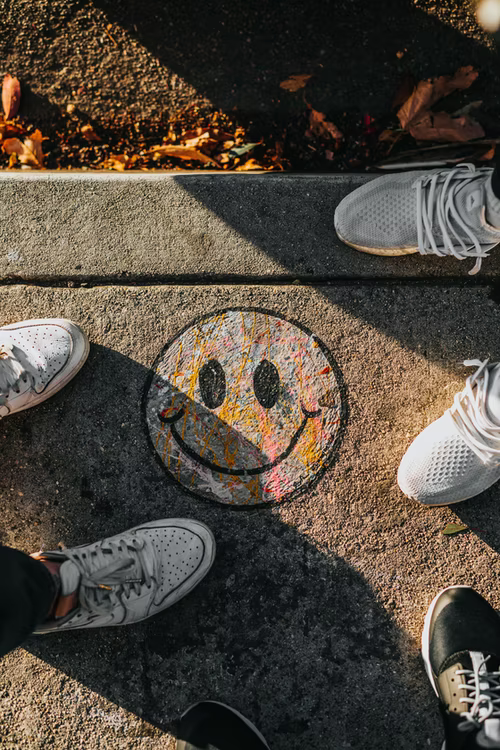

### Problem 4 (2 Points)
Our next goal is to introduce you to the world of Symbolic Computations. In Calculus, when you learn the chain rule and how to do variable changes under an integral, focus on the meaning and not the process. Because, when real engineers perform these operations, we employ appropriate tools to do the actual calculations. Humans make too many mistakes. 

In [ ]:
# Run me, don't change me, be patient
# using Pkg
# # Pkg.add("Symbolics")
# Pkg.add("SymbolicUtils")

using Symbolics
using SymbolicUtils

In [ ]:
# run me, don't change me
@variables x y z

In [ ]:
# run me, don't change me
# Create a function using the symbolic variables x, y, z
G = x^2*y^2*exp(z) - 14(y^2+x^2)*z + exp(sin(x) + cos(y) + z/(y^2+1))

In [ ]:
# run me, don't change me
# Compute a gradient 
JacG=Symbolics.jacobian([G],[x, y, z])

In [ ]:
# run me, don't change me
# Calculating the gradient
gradG=Symbolics.gradient(G,[x, y, z])

In [ ]:
# run me, don't change me
# Evaluating the gradient at point (2,3,4)
gradGpoint=substitute.(gradG, (Dict(x => 2.0, y => 3.0, z => 4.0),))

In [ ]:
# run me, don't change me
# Evaluating the Jacobian at a point (2,3,4)
JacGpoint=substitute.(JacG, (Dict(x => 2.0, y => 3.0, z => 4.0),))

In [ ]:
# run me, don't change me
typeof(JacG)

### Use the exact (symbolic) gradient and the substitute command to find a minimum of the function G starting from x0=[0;0;0]  (2 points)

#### G at the point xk
Gxk=substitute.(G, (Dict(x => xk[1], y => xk[2], z => xk[3]),))


#### gradG at the point xk
gradG=substitute.(JacG, (Dict(x => xk[1], y => xk[2], z => xk[3]),))

In [ ]:
## Gradient Descent
xk=[0;0.0;0]
@show  Gxk=substitute.(G, (Dict(x => xk[1], y => xk[2], z => xk[3]),))
@show gradG=substitute.(JacG, (Dict(x => xk[1], y => xk[2], z => xk[3]),))

### Your Task is to do at least a 1000 iterations of gradient descent for calculating a minimum of your function G. Use x0 = [0;0.0;0] and use the analytical gradient from the previous cell.

In [ ]:
# your code here
throw(ErrorException())
# xk = ??
Gxk=substitute.(G, (Dict(x => xk[1], y => xk[2], z => xk[3]),))
@show Gxk
xk

In [ ]:
println("all nothings means likely correct")
T1 = @assert(isapprox(Float64(Gxk[1]), 0.09855, atol = 0.001))
[T1]

In [ ]:
# Autograder cell

#### Example:  The Hessian
A reminder that the Hessian is the Jacobian of the transpose of the gradient of a function $f$: is that a mouthful or what? Why do we care? Extrema of a function (that is, max, min, and something else called a saddle point) "live" in the zero set of $ \nabla f(x)$. Hence, if $x^\ast$ is a local minimun of $f$, it satisfies $\nabla f(x^\ast)=0$, which means it is a root of $\nabla f(x)=0$. We can therefore apply Newton-Raphson to the gradient function in order to find its roots, and hence find local minima, for example. 

$$\begin{equation}
    \label{eq:Hessian}
    \nabla^2 f(x) := \frac{\partial}{\partial x} \left[ \nabla f(x) \right]^\top
\end{equation}$$
Where $\nabla^2 f(x) $ is the Hessian of $f$ at point $x$.

The following function uses a symmetric differences approximation to compute the Hessian of f at x0.

In [ ]:
# run me, don't change me. I will compute gradients and Hessians for you. 
# I am a workhorse of a function!
#
function gradHess(f,x0,h=0.01) 
    n=size(x0,1)
    H=zeros(n,n)
    gradf=zeros(1,n)
    Id=zeros(n,n)+I     
    delta=h
    for i=1:n
        ei=Id[:,i]
        gradf[i]=(f(x0+ h*ei) -f(x0 -  h*ei))[1]/(2*h)
        for j=1:n
            ej=Id[:,j]
            H[i,j]=(f(x0 + h*ei+delta*ej)-f(x0 + h*ei-delta*ej)-f(x0- h*ei+delta*ej)+f(x0- h*ei-delta*ej))[1]/(4*h*delta)
        end
    end
    return  gradf, H
end

In [ ]:
# run me, don't change me. I am creating a super complicated function to show you
# how efficiently gradHess can compute the gradient and the Hessian. I wish you luck
# doing this anlytically! Go for it, make my day!  
#
#f and x0 are declared to be random matrices/vectors of size 20 
using LinearAlgebra
using Random
Random.seed!(4321);
n=20;
A2=rand(n,n);
A4=rand(n,n);
f(x)= x'*A2*x + x'*x*x'*A4*x;
x0=rand(n,1)
#Here is in example using the Hessian function 
(gradN, Hess) =gradHess(f, x0)
@show gradN
Hess

### Problem 5 (2 Points) :  Use gradHess to minimize a function g(x), where $x\in \mathbb{R}^{20}$
Please re-read Chapter 12.5 in our textbook. A few key points are summarized here, but for the full context, please see the book! We have $g:\mathbb{R}^n \to \mathbb{R}$. We seek
$$x^\ast = {\rm arg~min}_{x\in \mathbb{R}^n} g(x) $$
We know that $x^\ast$ is a root of $\nabla g(x)$. Because the gradient is a row vector, we take its transpose and turn it into a column vector so that
$$ \nabla g^\top: \mathbb{R}^n \to \mathbb{R}^n.$$
We know how to find roots of vector-valued functions: we must apply Newton-Raphson to the function. To do that, we need the Jacobian of $\nabla g^\top(x)$, which is the Hessian. Yes, $\nabla^2g(x):= \frac{\partial }{\partial x }\nabla g^\top(x).$

Lucky you, we have provided free of charge the awesome function:

**(grad, Hess) = gradHess(g, x0)**

which computes both the gradient and the Hessian. You'll have to transpose the gradient yourself! We think you can handle it. Your mission therefore, is to implement the algorithm below on a gnarly function $g:\mathbb{R}^n \to \mathbb{R}$ and find its minimum to a tolerance of ${\rm tol}=10^{-6}$!
**Newton-Raphson applied to the transpose of the gradient so that a local minimum can be found: You must put this in some kind of loop (For or While), just as you did in HW for the Bisection Algorithm. 
In a loop, solve the top equation for $\Delta x_{k} $ and then use it to update the second equation.**
$$
\nabla^2 g(x_k)~ \Delta x_{k} = - \left[\nabla g(x_k) \right]^\top
$$
$$
x_{k+1}= x_k + \Delta x_{k}
$$
**Exit the loop when $||\nabla g(x_k)^\top|| < {\rm tol} $.
g(x) and an initial xk for k=0 are declared for you.  You may find that page 192-193 of the booklet is helpful here.**

In [ ]:
# run me, don't change me.
# this cell declares g(x), a function that depends on 20 variables, and xk for k=0, 
# which you are to use as your starting point
n=20 
Random.seed!(4321); 
A2=rand(n,n) 
A4=rand(n,n) 
g(x)= -x'*A2'*A2*x + x'*x*x'*A4'*A4*x
k=0
xk=100*rand(n,1)-200*rand(n,1)

#### Find the minimum, and save the value of the minimizer, x*, in a variable called x_star, save the minimum value of g in a variable called g_min, and then use the gradHess function that we provided to calculate the Hessian. 

Remember the while loop structure we talked about:
**Exit the loop when $||\nabla g(x_k)^\top|| < {\rm tol} $.
g(x).  You may find that page 192-193 of the booklet is helpful here.**

In [ ]:
#Use this cell to find the minimum
#Save the value of the minimizer, x*, in a variable called x_star
#Save the minimum value of g in a variable called g_min
#Use the gradHess function that we provided to calculate the Hessian

# your code here
throw(ErrorException())

# x_star = ??

In [ ]:
# Friendly autograder test

# This should give you an idea if your solution is close to ours

println("all nothings means likely correct")
g_min = g(x_star)
T1 = @assert isapprox(g_min[1], -31.241451336509662, atol = 0.001)
[T1]

In [ ]:
#autograder cell